Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2036 - accuracy: 0.5723 - val_loss: 0.7002 - val_accuracy: 0.7588
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6191 - accuracy: 0.7822 - val_loss: 0.5657 - val_accuracy: 0.8072
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5388 - accuracy: 0.8121 - val_loss: 0.5233 - val_accuracy: 0.8234
Epoch 4/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5010 - accuracy: 0.8251 - val_loss: 0.4865 - val_accuracy: 0.8336
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
Highest accuracy so far: 0.7607
Parameters: Number of Hidden Layers: 2,number of neurons: 10,learning rate: 0.01

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7668 - accuracy: 0.7281 - val_loss: 0.5440 - val_accuracy: 0.8058
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5055 - accuracy: 0.8218 - val

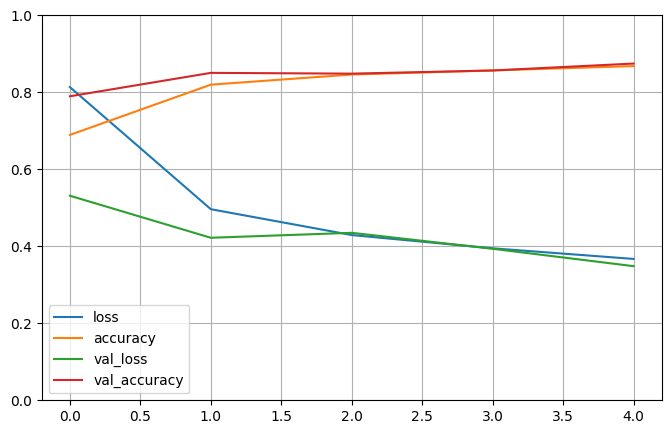

In [3]:
# -------------------------------------------------------------------------
# AUTHOR: Sherelene De Belen
# FILENAME: deep_learning.ipynb / deep_learning.py
# SPECIFICATION: Dataset fashion MNIST using jupyter notebook and uploading as regular python file
# FOR: CS 4210- Assignment #4
# TIME SPENT: 3 hours
# -----------------------------------------------------------*/

# IMPORTANT NOTE: YOU CAN USE ANY PYTHON LIBRARY TO COMPLETE YOUR CODE.

# importing the libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model


def build_model(n_hidden, n_neurons_hidden, n_neurons_output, learning_rate):
    # -->add your Pyhton code here

    # Creating the Neural Network using the Sequential API
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))  # input layer

    # iterate over the number of hidden layers to create the hidden layers:
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons_hidden, activation="relu"))  # hidden layer with ReLU activation function

    # output layer
    model.add(keras.layers.Dense(n_neurons_output,
                                 activation="softmax"))  # output layer with one neural for each class and the softmax activation function since the classes are exclusive

    # defining the learning rate
    opt = keras.optimizers.SGD(learning_rate)

    # Compiling the Model specifying the loss function and the optimizer to use.
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model


# To install Tensor Flow on your terminal
# python -m pip install --upgrade tensorflow

# Using Keras to Load the Dataset. Every image is represented as a 28×28 array rather than a 1D array of size 784.
# Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0).
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# creating a validation set and scaling the features
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# For Fashion MNIST, we need the list of class names to know what we are dealing with. For instance, class_names[
# y_train[0]] = 'Coat'
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Iterate here over number of hidden layers, number of neurons in each hidden layer and the learning rate.
# -->add your Pyhton code here

n_hidden = [2, 5, 10]
n_neurons = [10, 50, 100]
l_rate = [0.01, 0.05, 0.1]


highestAccuracy = 0
for hidden in n_hidden:  # looking or the best parameters w.r.t the number of hidden layers
    for neurons in n_neurons:  # looking or the best parameters w.r.t the number of neurons
        for rate in l_rate:  # looking or the best parameters w.r.t the learning rate

            # build the model for each combination by calling the function:
            # model = build_model()
            # -->add your Pyhton code here
            model = build_model(hidden, neurons, len(class_names), rate)

            # To train the model history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
            # #epochs = number times that the learning algorithm will work through the entire training dataset.
            # -->add your Pyhton code here
            history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

            # Calculate the accuracy of this neural network and store its value if it is the highest so far. To make
            # a prediction, do:
            class_predicted = np.argmax(model.predict(X_test), axis=-1)
            # -->add your Pyhton code here
            accuracy = accuracy_score(class_predicted, y_test)
            if highestAccuracy < accuracy:
                highestAccuracy = accuracy
            print("Highest accuracy so far: " + str(highestAccuracy))
            print("Parameters: " + "Number of Hidden Layers: " + str(hidden) + ",number of neurons: " + str(
                neurons) + ",learning rate: " + str(rate))
            print()

# After generating all neural networks, print the summary of the best model found The model’s summary() method
# displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it
# when creating the layer), its output shape (None means the batch size can be anything), and its number of
# parameters. Note that Dense layers often have a lot of parameters. This gives the model quite a lot of flexibility
# to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not
# have a lot of training data.

weights, biases = model.layers[1].get_weights()
print(weights)
print(biases)


print(model.summary())
img_file = './model_arch.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

# plotting the learning curves of the best model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()
